In [130]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *
import sys
from getHomographedImg import *
sys.path.append('gradient_blending')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
# img1=cv2.imread('images/mountain-left.jpg')
# img2=cv2.imread('images/mountain-middle.jpg')
# img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/firewatch-left.jpg')
# img2=cv2.imread('images/firewatch-middle.jpg')
# img3=cv2.imread('images/firewatch-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
img1=cv2.imread('images/web-left.jpg')
img2=cv2.imread('images/web-middle.jpg')
img3=cv2.imread('images/web-right.jpg')

HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

2399
10360
Rmax2.8284271247461903
(425,)
(416,)
MaxInlierCount416
Final H[[ 1.07740420e+00 -1.01856080e-02 -2.10920326e+02]
 [ 5.89609882e-02  1.05928353e+00 -2.46015453e+01]
 [ 1.64534424e-04  1.36570447e-05  1.00000000e+00]]
10360
5184
Rmax1.0
(256,)
(252,)
MaxInlierCount252
Final H[[ 1.07876922e+00  4.42088903e-03 -2.35568130e+02]
 [ 4.65785396e-02  1.06329944e+00 -1.56792491e+01]
 [ 1.71954090e-04  1.44623271e-05  1.00000000e+00]]


[[1, 0, 215.0], [0, 1, 25.0], [0, 0, 1]]
[[ 1.07740420e+00 -1.01856080e-02 -2.10920326e+02]
 [ 5.89609882e-02  1.05928353e+00 -2.46015453e+01]
 [ 1.64534424e-04  1.36570447e-05  1.00000000e+00]]
[[ 1.11277910e+00 -7.24934335e-03  4.07967393e+00]
 [ 6.30743488e-02  1.05962495e+00  3.98454739e-01]
 [ 1.64534424e-04  1.36570447e-05  1.00000000e+00]]


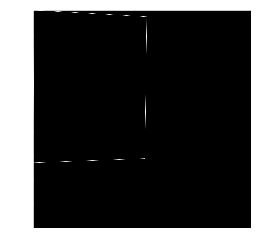

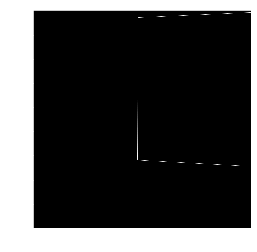

TypeError: slice indices must be integers or None or have an __index__ method

In [139]:
canvas,poisson = stitch3(img1,img2,img3,HLM,HMR)

cv2.imwrite("res.png",canvas)
cv2.imwrite("poison.png",poisson)

In [126]:
# Sclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# canvas[:,:,0] = clahe.apply(canvas[:,:,0])
# canvas[:,:,1] = clahe.apply(canvas[:,:,1])
# canvas[:,:,2] = clahe.apply(canvas[:,:,2])
# # canvas[:,:,0] = cv2.equalizeHist(canvas[:,:,0])
# # canvas[:,:,1] = cv2.equalizeHist(canvas[:,:,1])
# # canvas[:,:,2] = cv2.equalizeHist(canvas[:,:,2])

In [127]:
f = np.array([[1,2,3],[4,5,6]])
a = np.linspace(0,1,f.shape[1])
np.multiply(f,a)
print(1-a)


[1.  0.5 0. ]


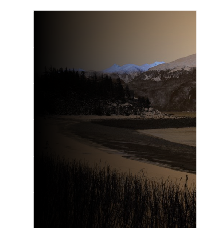

In [128]:
a = np.linspace(0,1,img1.shape[1])
f = np.ones((img1.shape[0],img1.shape[1]))
f=f*a
f3 = np.zeros((img1.shape[0],img1.shape[1],3))
f3[:,:,0]=f
f3[:,:,1]=f
f3[:,:,2]=f
r=f3*img1
plt.imshow(r.astype('int'))


[[ 1.07740420e+00 -1.01856080e-02 -2.10920326e+02]
 [ 5.89609882e-02  1.05928353e+00 -2.46015453e+01]
 [ 1.64534424e-04  1.36570447e-05  1.00000000e+00]]
-215 255 -25 606
cornerssss [[-211. -215.  255.  247.]
 [ -25.  606.    2.  589.]
 [   1.    1.    1.    1.]]
216 686 -15 621
cornerssss [[218. 216. 685. 686.]
 [  5. 595. -15. 621.]
 [  1.   1.   1.   1.]]


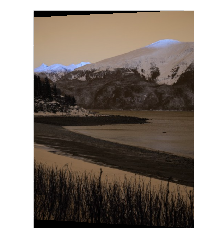

In [136]:
plt.imshow(img1) 
print(HLM)
plt.imshow(getHomographedImg(img1,HLM).astype('int'))
plt.imshow(getHomographedImg(img2,np.linalg.inv(HMR)).astype('int'))

